<a href="https://colab.research.google.com/github/prximenes/neural-networks-if702/blob/main/MiniProjeto1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
from tensorflow import keras

import matplotlib.pyplot as plt
import numpy as np
import sklearn

In [3]:
mnist = keras.datasets.mnist

In [4]:
(X_train_full, y_train_full), (X_test, y_test) = mnist.load_data()


11493376/11490434 [==============================] - 0s 0us/step


In [5]:
X_valid, X_train = X_train_full[:5000] / 255., X_train_full[5000:] / 255.
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]
X_test = X_test / 255.

In [8]:
#Tamanho dos conjuntos de Treino, Teste e Validação
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape, X_valid.shape, y_valid.shape)

(55000, 28, 28) (55000,) (10000, 28, 28) (10000,) (5000, 28, 28) (5000,)


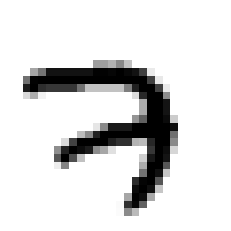

In [ ]:
plt.imshow(X_train[0], cmap="binary")
plt.axis('off')
plt.show()

In [ ]:
y_train

array([7, 3, 4, ..., 5, 6, 8], dtype=uint8)

In [ ]:
class_names = ["0","1","2","3","4","5","6","7","8","9"]

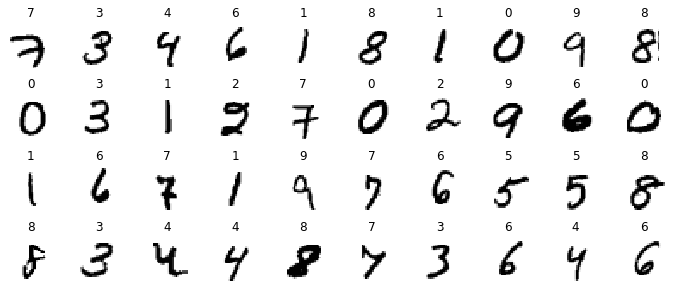

In [ ]:
n_rows = 4
n_cols = 10
plt.figure(figsize=(n_cols * 1.2, n_rows * 1.2))
for row in range(n_rows):
    for col in range(n_cols):
        index = n_cols * row + col
        plt.subplot(n_rows, n_cols, index + 1)
        plt.imshow(X_train[index], cmap="binary", interpolation="nearest")
        plt.axis('off')
        plt.title(class_names[y_train[index]], fontsize=12)
plt.subplots_adjust(wspace=0.2, hspace=0.5)
plt.show()

In [ ]:
keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)

In [ ]:
import pandas as pd
from sklearn.metrics import accuracy_score, plot_confusion_matrix, confusion_matrix, classification_report
import seaborn as sns

def mlp_classifier(params):
  #Carregando o dataset de treino e o dataset de teste
  (X_train_full, y_train_full), (X_test, y_test) = mnist.load_data()

  #Separando uma parte do conjunto de teste para ser utilizada como conjunto de validação
  X_valid, X_train = X_train_full[:5000] / 255., X_train_full[5000:] / 255.
  y_valid, y_train = y_train_full[:5000], y_train_full[5000:]
  X_test = X_test / 255.

  #Definindo a Rede Neural com 1 camada intermediária
  if params['hidden_layers'] == 1:
    model = keras.models.Sequential()
    model.add(keras.layers.Flatten(input_shape=[28, 28]))
    model.add(keras.layers.Dense(params['neurons'], activation=params['activation_func']))
    model.add(keras.layers.Dense(10, activation="softmax"))
  
  #Definindo a Rede Neural com 2 camada intermediária
  if params['hidden_layers'] == 2:
    model = keras.models.Sequential()
    model.add(keras.layers.Flatten(input_shape=[28, 28]))
    model.add(keras.layers.Dense(params['neurons'], activation=params['activation_func']))
    model.add(keras.layers.Dense(params['neurons'], activation=params['activation_func']))
    model.add(keras.layers.Dense(10, activation="softmax"))

  #Definindo a Rede Neural com 4 camada intermediária
  if params['hidden_layers'] == 4:
    model = keras.models.Sequential()
    model.add(keras.layers.Flatten(input_shape=[28, 28]))
    model.add(keras.layers.Dense(params['neurons'], activation=params['activation_func']))
    model.add(keras.layers.Dense(params['neurons'], activation=params['activation_func']))
    model.add(keras.layers.Dense(params['neurons'], activation=params['activation_func']))
    model.add(keras.layers.Dense(params['neurons'], activation=params['activation_func']))
    model.add(keras.layers.Dense(10, activation="softmax"))

  print(model.summary())
  print(keras.utils.plot_model(model, "mnist_model.png", show_shapes=True))

  #
  model.compile(loss="sparse_categorical_crossentropy",
              optimizer=params['optm'],
              metrics=["accuracy"])
  
  #Treinando a Rede Neural definida utilizando 30 épocas
  history = model.fit(X_train, y_train, epochs=params["epochs"],
                    validation_data=(X_valid, y_valid))
  
  #Plotando o histórico do treino
  pd.DataFrame(history.history).plot(figsize=(8, 5))
  plt.grid(True)
  plt.gca().set_ylim(0, 1)
  plt.show()

  #Avaliando o modelo para o conjunto de teste
  model.evaluate(X_test, y_test)

  y_pred = np.argmax(model.predict(X_test), axis=-1)
  y_true = y_test

  #Matriz de Confusão, acurácia do modelo
  print(classification_report(y_true, y_pred))  

  cnf_matrix = confusion_matrix(y_true, y_pred)

  df_cm = pd.DataFrame(cnf_matrix, index = [i for i in "0123456789"],
                    columns = [i for i in "0123456789"])
  plt.figure(figsize = (10,7))
  sns.heatmap(df_cm, annot=True, cmap="YlGnBu", fmt='g')

Experimento 0: 

*   1 camada escondidas com 15 neuronios cada
*   Relu como função de ativação
*   30 epocas
*   learning_rate=0.0001

Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_9 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_41 (Dense)             (None, 16)                12560     
_________________________________________________________________
dense_42 (Dense)             (None, 10)                170       
Total params: 12,730
Trainable params: 12,730
Non-trainable params: 0
_________________________________________________________________
None
<IPython.core.display.Image object>
Epoch 1/30
1719/1719 [==============================] - 4s 2ms/step - loss: 0.7287 - accuracy: 0.7938 - val_loss: 0.2655 - val_accuracy: 0.9252
Epoch 2/30
1719/1719 [==============================] - 3s 2ms/step - loss: 0.2663 - accuracy: 0.9243 - val_loss: 0.2238 - val_accuracy: 0.9376
Epoch 3/30
1719/1719 [=============================

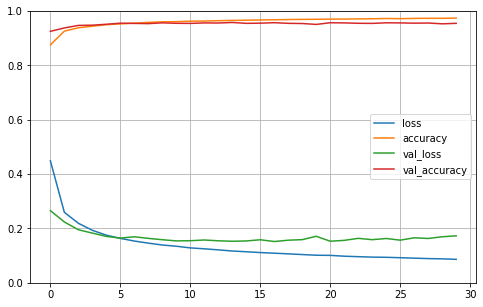

313/313 [==============================] - 1s 2ms/step - loss: 0.1663 - accuracy: 0.9571
              precision    recall  f1-score   support

           0       0.97      0.98      0.97       980
           1       0.98      0.99      0.98      1135
           2       0.97      0.94      0.95      1032
           3       0.93      0.96      0.94      1010
           4       0.96      0.96      0.96       982
           5       0.94      0.96      0.95       892
           6       0.97      0.95      0.96       958
           7       0.96      0.96      0.96      1028
           8       0.94      0.94      0.94       974
           9       0.95      0.94      0.95      1009

    accuracy                           0.96     10000
   macro avg       0.96      0.96      0.96     10000
weighted avg       0.96      0.96      0.96     10000



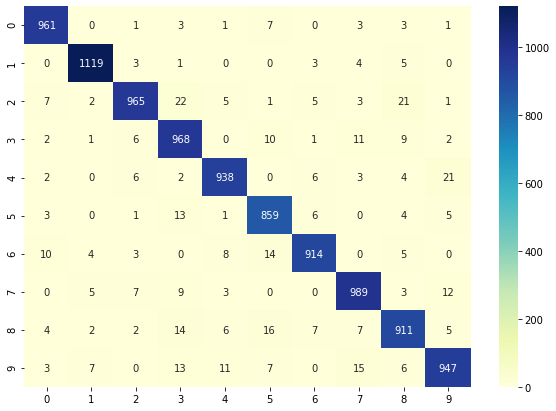

In [ ]:
params = {
    "activation_func":"relu",
    "neurons": 16,
    "hidden_layers":1,
    "epochs": 30,
    "optm": "adam"
}

mlp_classifier(params)

Experimento 1: 

*   Duas camadas escondidas com 16 neuronios cada
*   Relu como função de ativação
*   30 epocas
*   learning_rate=0.0001



Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_3 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_9 (Dense)              (None, 16)                12560     
_________________________________________________________________
dense_10 (Dense)             (None, 16)                272       
_________________________________________________________________
dense_11 (Dense)             (None, 10)                170       
Total params: 13,002
Trainable params: 13,002
Non-trainable params: 0
_________________________________________________________________
None
<IPython.core.display.Image object>
Epoch 1/30
1719/1719 [==============================] - 3s 1ms/step - loss: 0.7377 - accuracy: 0.7738 - val_loss: 0.2449 - val_accuracy: 0.9304
Epoch 2/30
1719/1719 [==============================] - 2s 1ms/

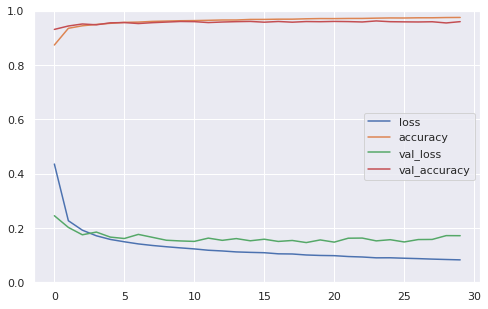

313/313 [==============================] - 0s 887us/step - loss: 0.1575 - accuracy: 0.9591
              precision    recall  f1-score   support

           0       0.98      0.98      0.98       980
           1       0.98      0.99      0.98      1135
           2       0.96      0.95      0.96      1032
           3       0.94      0.97      0.95      1010
           4       0.97      0.93      0.95       982
           5       0.94      0.96      0.95       892
           6       0.98      0.96      0.97       958
           7       0.95      0.96      0.96      1028
           8       0.97      0.93      0.95       974
           9       0.92      0.96      0.94      1009

    accuracy                           0.96     10000
   macro avg       0.96      0.96      0.96     10000
weighted avg       0.96      0.96      0.96     10000



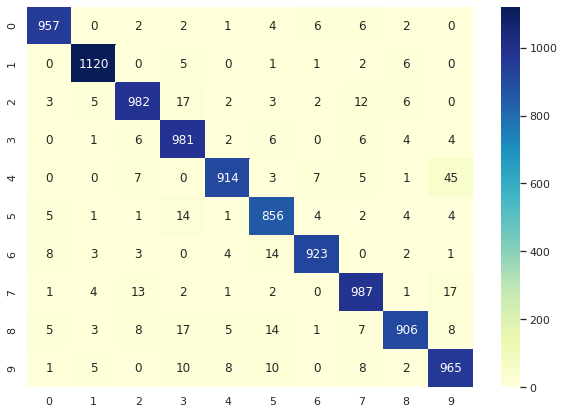

In [ ]:
params = {
    "activation_func":"relu",
    "neurons": 16,
    "hidden_layers":2,
    "epochs": 30,
    "optm": "adam"
}

mlp_classifier(params)

Experimento 2: 

*   Duas camadas escondidas com 200 neuronios cada
*   Relu como função de ativação
*   30 epocas
*   learning_rate=0.0001

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 200)               157000    
_________________________________________________________________
dense_4 (Dense)              (None, 200)               40200     
_________________________________________________________________
dense_5 (Dense)              (None, 10)                2010      
Total params: 199,210
Trainable params: 199,210
Non-trainable params: 0
_________________________________________________________________
None
<IPython.core.display.Image object>
Epoch 1/30
1719/1719 [==============================] - 4s 2ms/step - loss: 0.3786 - accuracy: 0.8893 - val_loss: 0.1091 - val_accuracy: 0.9658
Epoch 2/30
1719/1719 [==============================] - 3s 2m

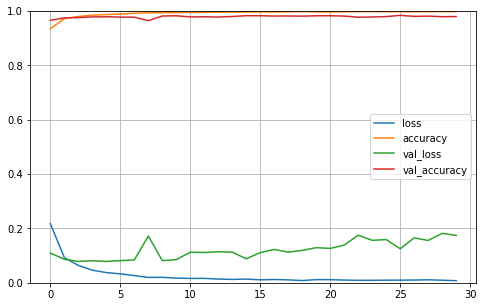

313/313 [==============================] - 1s 2ms/step - loss: 0.1630 - accuracy: 0.9781
              precision    recall  f1-score   support

           0       0.99      0.98      0.99       980
           1       0.99      1.00      0.99      1135
           2       0.97      0.98      0.98      1032
           3       0.98      0.97      0.98      1010
           4       0.98      0.97      0.97       982
           5       0.97      0.98      0.98       892
           6       0.99      0.97      0.98       958
           7       0.97      0.98      0.97      1028
           8       0.98      0.97      0.98       974
           9       0.95      0.98      0.97      1009

    accuracy                           0.98     10000
   macro avg       0.98      0.98      0.98     10000
weighted avg       0.98      0.98      0.98     10000



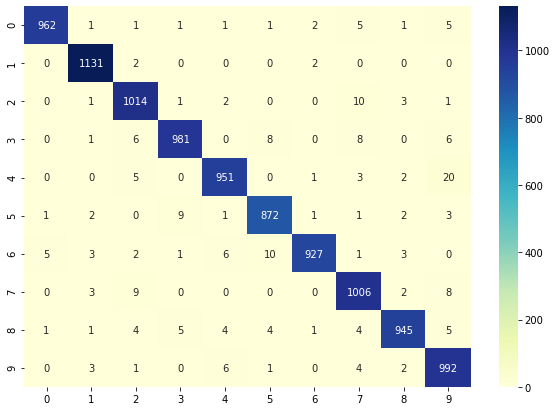

In [ ]:
params = {
    "activation_func":"relu",
    "neurons": 200,
    "hidden_layers":2,
    "epochs": 30,
    "optm": "adam"
}

mlp_classifier(params)

Experimento 3: 

*   Quatro camadas escondidas com 200 neuronios cada
*   Relu como função de ativação
*   30 epocas
*   learning_rate=0.0001

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_2 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_6 (Dense)              (None, 200)               157000    
_________________________________________________________________
dense_7 (Dense)              (None, 200)               40200     
_________________________________________________________________
dense_8 (Dense)              (None, 200)               40200     
_________________________________________________________________
dense_9 (Dense)              (None, 200)               40200     
_________________________________________________________________
dense_10 (Dense)             (None, 10)                2010      
Total params: 279,610
Trainable params: 279,610
Non-trainable params: 0
________________________________________________

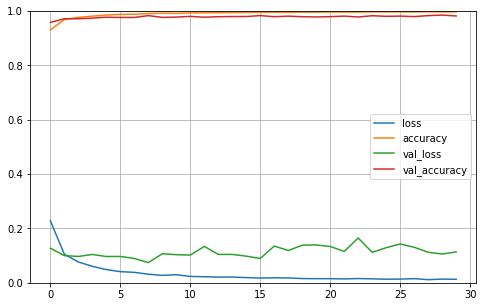

313/313 [==============================] - 1s 2ms/step - loss: 0.1640 - accuracy: 0.9802
              precision    recall  f1-score   support

           0       0.98      1.00      0.99       980
           1       0.99      0.99      0.99      1135
           2       0.99      0.98      0.98      1032
           3       0.98      0.98      0.98      1010
           4       0.99      0.97      0.98       982
           5       0.98      0.97      0.98       892
           6       0.98      0.98      0.98       958
           7       0.98      0.98      0.98      1028
           8       0.97      0.97      0.97       974
           9       0.97      0.98      0.97      1009

    accuracy                           0.98     10000
   macro avg       0.98      0.98      0.98     10000
weighted avg       0.98      0.98      0.98     10000



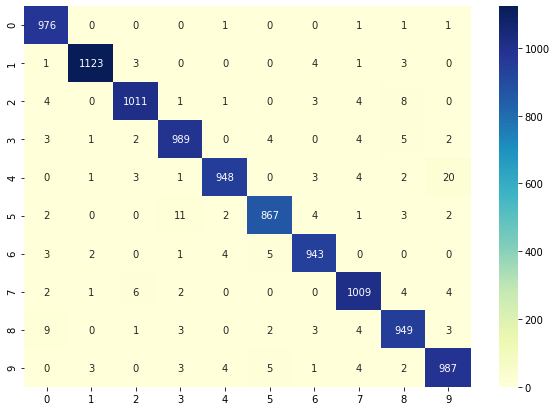

In [ ]:
params = {
    "activation_func":"relu",
    "neurons": 200,
    "hidden_layers":4,
    "epochs": 30,
    "optm": "adam"
}

mlp_classifier(params)

Experimento 4: 

*   Quatro camadas escondidas com 200 neuronios cada
*   Sigmoid como função de ativação
*   30 epocas
*   learning_rate=0.001

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_3 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_11 (Dense)             (None, 200)               157000    
_________________________________________________________________
dense_12 (Dense)             (None, 200)               40200     
_________________________________________________________________
dense_13 (Dense)             (None, 200)               40200     
_________________________________________________________________
dense_14 (Dense)             (None, 200)               40200     
_________________________________________________________________
dense_15 (Dense)             (None, 10)                2010      
Total params: 279,610
Trainable params: 279,610
Non-trainable params: 0
________________________________________________

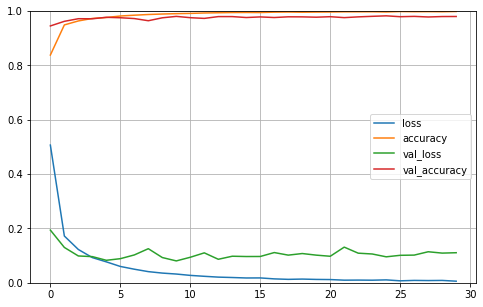

313/313 [==============================] - 1s 2ms/step - loss: 0.1352 - accuracy: 0.9774
              precision    recall  f1-score   support

           0       0.97      0.99      0.98       980
           1       1.00      0.99      0.99      1135
           2       0.97      0.99      0.98      1032
           3       0.97      0.98      0.97      1010
           4       0.98      0.97      0.98       982
           5       0.98      0.96      0.97       892
           6       0.98      0.98      0.98       958
           7       0.97      0.98      0.98      1028
           8       0.98      0.97      0.97       974
           9       0.97      0.97      0.97      1009

    accuracy                           0.98     10000
   macro avg       0.98      0.98      0.98     10000
weighted avg       0.98      0.98      0.98     10000



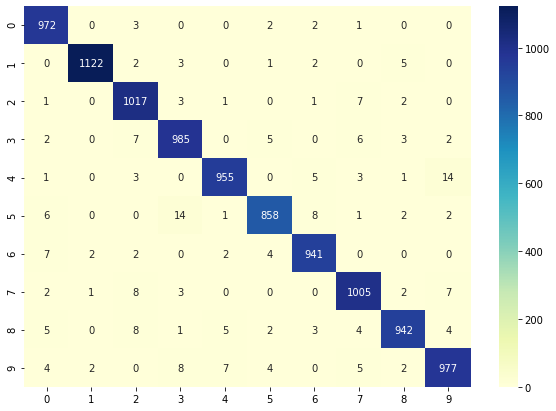

In [ ]:
params = {
    "activation_func":"sigmoid",
    "neurons": 200,
    "hidden_layers":4,
    "epochs": 30,
    "optm": "adam"
}

mlp_classifier(params)

Experimento 5: 

*   Quatro camadas escondidas com 200 neuronios cada
*   relu como função de ativação
*   30 epocas
*   learning_rate=0.0001

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_7 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_31 (Dense)             (None, 200)               157000    
_________________________________________________________________
dense_32 (Dense)             (None, 200)               40200     
_________________________________________________________________
dense_33 (Dense)             (None, 200)               40200     
_________________________________________________________________
dense_34 (Dense)             (None, 200)               40200     
_________________________________________________________________
dense_35 (Dense)             (None, 10)                2010      
Total params: 279,610
Trainable params: 279,610
Non-trainable params: 0
________________________________________________

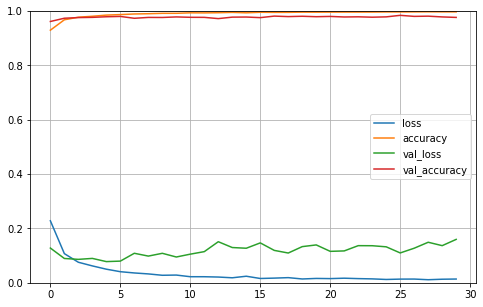

313/313 [==============================] - 1s 2ms/step - loss: 0.1464 - accuracy: 0.9795
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       980
           1       0.99      0.99      0.99      1135
           2       0.98      0.98      0.98      1032
           3       0.97      0.99      0.98      1010
           4       0.99      0.95      0.97       982
           5       0.97      0.99      0.98       892
           6       0.99      0.98      0.99       958
           7       0.97      0.98      0.98      1028
           8       0.98      0.98      0.98       974
           9       0.96      0.97      0.97      1009

    accuracy                           0.98     10000
   macro avg       0.98      0.98      0.98     10000
weighted avg       0.98      0.98      0.98     10000



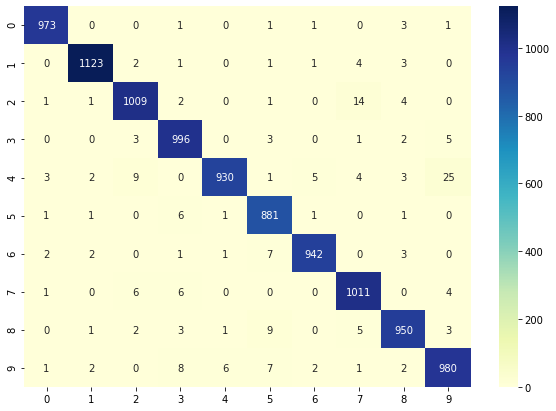

In [ ]:
optm = tf.keras.optimizers.Adam(learning_rate=0.0001)

params = {
    "activation_func":"relu",
    "neurons": 200,
    "hidden_layers":4,
    "epochs": 30,
    "optm": optm
}

mlp_classifier(params)

Experimento 6: 

*   Quatro camadas escondidas com 200 neuronios cada
*   relu como função de ativação
*   30 epocas
*   learning_rate=3

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_6 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_26 (Dense)             (None, 200)               157000    
_________________________________________________________________
dense_27 (Dense)             (None, 200)               40200     
_________________________________________________________________
dense_28 (Dense)             (None, 200)               40200     
_________________________________________________________________
dense_29 (Dense)             (None, 200)               40200     
_________________________________________________________________
dense_30 (Dense)             (None, 10)                2010      
Total params: 279,610
Trainable params: 279,610
Non-trainable params: 0
________________________________________________

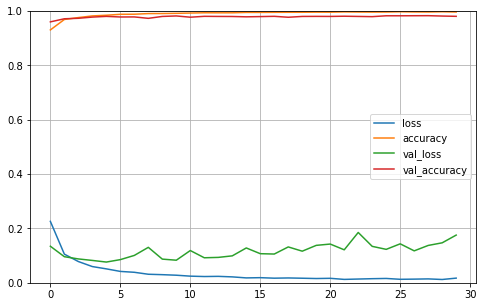

313/313 [==============================] - 1s 2ms/step - loss: 0.1889 - accuracy: 0.9778
              precision    recall  f1-score   support

           0       0.98      1.00      0.99       980
           1       0.98      0.99      0.99      1135
           2       0.99      0.97      0.98      1032
           3       0.96      0.99      0.97      1010
           4       0.98      0.98      0.98       982
           5       0.98      0.98      0.98       892
           6       0.98      0.98      0.98       958
           7       0.96      0.98      0.97      1028
           8       0.98      0.95      0.96       974
           9       0.98      0.96      0.97      1009

    accuracy                           0.98     10000
   macro avg       0.98      0.98      0.98     10000
weighted avg       0.98      0.98      0.98     10000



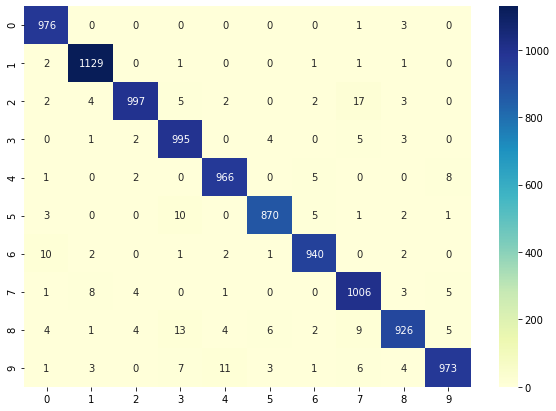

In [ ]:
optm = tf.keras.optimizers.Adam(learning_rate=3)

params = {
    "activation_func":"relu",
    "neurons": 200,
    "hidden_layers":4,
    "epochs": 30,
    "optm": optm
}

mlp_classifier(params)

Experimento 7: 

*   Quatro camadas escondidas com 200 neuronios cada
*   Relu como função de ativação
*   100 epocas
*   learning_rate=0.001

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_8 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_36 (Dense)             (None, 200)               157000    
_________________________________________________________________
dense_37 (Dense)             (None, 200)               40200     
_________________________________________________________________
dense_38 (Dense)             (None, 200)               40200     
_________________________________________________________________
dense_39 (Dense)             (None, 200)               40200     
_________________________________________________________________
dense_40 (Dense)             (None, 10)                2010      
Total params: 279,610
Trainable params: 279,610
Non-trainable params: 0
________________________________________________

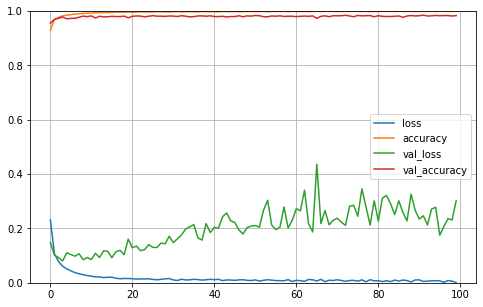

313/313 [==============================] - 1s 2ms/step - loss: 0.4174 - accuracy: 0.9825
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       980
           1       0.99      0.99      0.99      1135
           2       0.99      0.98      0.98      1032
           3       0.98      0.98      0.98      1010
           4       0.99      0.98      0.98       982
           5       0.98      0.97      0.97       892
           6       0.99      0.98      0.99       958
           7       0.97      0.99      0.98      1028
           8       0.98      0.98      0.98       974
           9       0.97      0.97      0.97      1009

    accuracy                           0.98     10000
   macro avg       0.98      0.98      0.98     10000
weighted avg       0.98      0.98      0.98     10000



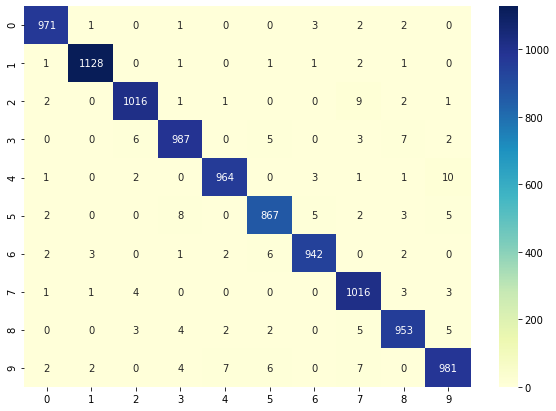

In [ ]:
params = {
    "activation_func":"relu",
    "neurons": 200,
    "hidden_layers":4,
    "epochs": 100,
    "optm": "adam"
}

mlp_classifier(params)